In [ ]:
pip install seaborn


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1. Первичный анализ данных c Pandas

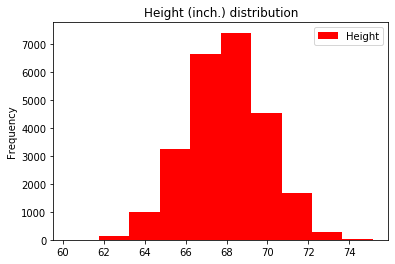

In [4]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [5]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


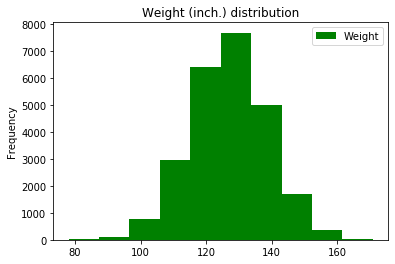

In [6]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (inch.) distribution')

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

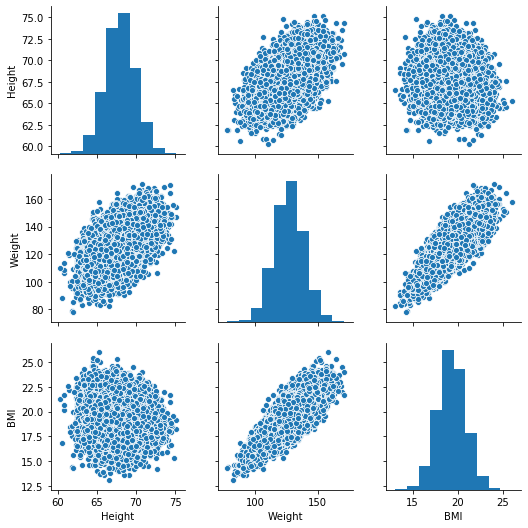

In [9]:
sns.pairplot(data)

Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

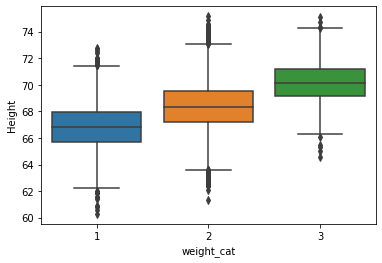

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(data=data, x='weight_cat' , y= 'Height')

Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

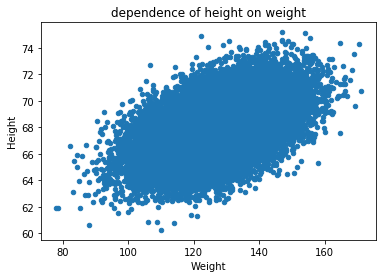

In [11]:
data.plot(y='Height', x='Weight', kind='scatter', 
             title='dependence of height on weight')

# Задание 2. Минимизация квадратичной ошибки

In [18]:
def error(w1,w0,X ,Y):
    k = [ (Y[i]-w0-w1*X[i])**2 for i in range(1,len(X))]
    return sum(k)    

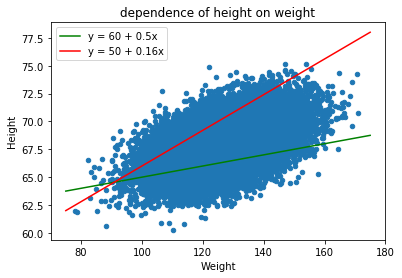

In [31]:
data.plot(y='Height', x='Weight', kind='scatter', 
             title='dependence of height on weight')
x=np.linspace(75,175,100)
y=[60+0.05*xi for xi in x]
plt.plot(x,y, color ='green' ,label='y = 60 + 0.5x')
y=[50+0.16*xi for xi in x]
plt.plot(x,y, color='red',label ='y = 50 + 0.16x')
plt.legend(loc='upper left')
plt.show()

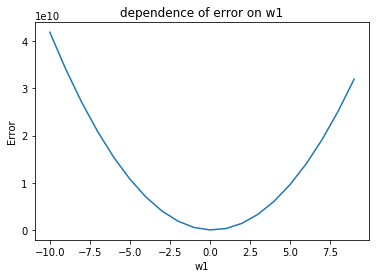

In [21]:
w0 = 50
w1 = [ i for i in range(-10,10,1)]
er = [ error(i,w0,data['Weight'], data['Height'])  for i in w1]
fig , ax = plt.subplots()
plt.plot(w1,er)
ax.set_xlabel('w1')
ax.set_ylabel('Error')
plt.title('dependence of error on w1')
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте

In [32]:
import scipy.optimize as opt
opt_w1 = opt.minimize_scalar(lambda w1: error(w1, w0 = w0,X =data['Weight'],Y=data['Height']), bounds=(-5,5))

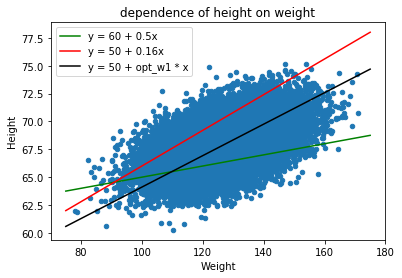

In [34]:
data.plot(y='Height', x='Weight', kind='scatter', 
             title='dependence of height on weight')
x=np.linspace(75,175,100)
y=[60+0.05*xi for xi in x]
plt.plot(x,y, color ='green' ,label='y = 60 + 0.5x')
y=[50+0.16*xi for xi in x]
plt.plot(x,y, color='red',label ='y = 50 + 0.16x')
y=[50+opt_w1.x*xi for xi in x]
plt.plot(x,y, color='k',label ='y = 50 + opt_w1 * x')
plt.legend(loc='upper left')
plt.show()

In [35]:
from mpl_toolkits.mplot3d import Axes3D

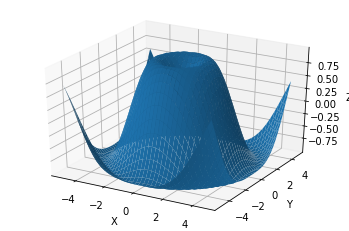

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

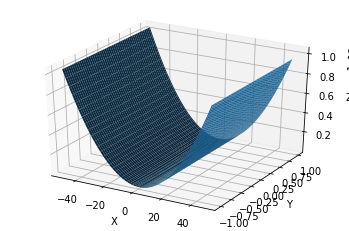

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis
W0 = np.arange(-50, 50, 1)
W1 = np.arange(-1, 1, 0.02)
W0, W1 = np.meshgrid(W0, W1)
error1 = lambda w1,w0: error(w1,w0, X =data['Weight'],Y=data['Height'])
Z = error1(W0,W1)
surf = ax.plot_surface(W0, W1, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [40]:
def error2(w):
    X = data['Weight'] 
    Y = data['Height']
    w0=w[0]
    w1=w[1]
    k = [ (Y[i]-w0-w1*X[i])**2 for i in range(1,len(X))]
    return sum(k)   

In [42]:
opt_w = opt.minimize(error2,[0,0], method ='L-BFGS-B', bounds=((-100,100),(-5,5)))

In [43]:
opt_w

      fun: 67544.15205474794
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.2401066 , 27.84072421])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 12
   status: 0
  success: True
        x: array([57.57162441,  0.08200738])

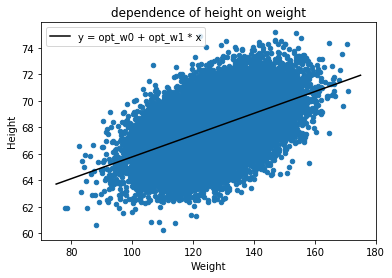

In [49]:
data.plot(y='Height', x='Weight', kind='scatter', 
             title='dependence of height on weight')
x=np.linspace(75,175,100)
y=[opt_w.x[0]+opt_w.x[1]*xi for xi in x]
plt.plot(x,y, color='k',label ='y = opt_w0 + opt_w1 * x')
plt.legend(loc='upper left')
plt.show()